In [1]:
#Edgar Moises Hernandez-Gonzalez
#18/06/19-20/06/19
#MLP de 2 capas ocultas, optimizar los parametros del MLP con PSO

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import time

In [3]:
#media del accuracy obtenido en la validacion cruzada de 5
def calcularFitness(funcionActivacion, neuronasCapa1, neuronasCapa2, optimizador):
    if funcionActivacion == 0:
        fx = 'relu'
    elif funcionActivacion == 1:
        fx = 'tanh'
    elif funcionActivacion == 2:
        fx = 'logistic'
        
    if optimizador == 0:
        opt = 'adam'
    elif optimizador == 1:
        opt = 'sgd'
    elif optimizador == 2:
        opt = 'lbfgs'
        
    clf = MLPClassifier(activation = fx, hidden_layer_sizes = (neuronasCapa1, neuronasCapa2), solver = opt)
    #print("Red Neuronal:", clf)
    puntuaciones = cross_val_score(clf, x, y, cv = 5) #accuracy
    #print("Validacion Cruzada:", puntuaciones)
    #print("Promedio:", puntuaciones.mean())
    return puntuaciones.mean() #media de la validacion cruzada

In [4]:
#datos para la red neuronal
datos = pd.read_csv("CaracteristicasSuj15.csv", header=None)
x = datos.iloc[:, 0:54].values
y = datos.iloc[:, 54].values
print(x.shape)
print(y.shape)

(181, 54)
(181,)


In [5]:
#parametros de PSO e inicializar el cumulo (posicion y velocidad)

#tamano de la poblacion
n = 16
#numero de variables
m = 4

#inicializar cumulo (enjambre)
x1 = np.random.randint(2 + 1, size = n) #[0, 2+1) por eso +1, aleatorio entero entre 0 y 2
x2 = np.random.randint(3, 200 + 1, size = n) #[3, 200+1) por eso +1, aleatorio entero entre 3 y 200
x3 = np.random.randint(3, 200 + 1, size = n) #[3, 200+1) por eso +1, aleatorio entero entre 3 y 200
x4 = np.random.randint(2 + 1, size = n) #[0, 2+1) por eso +1, aleatorio entero entre 0 y 2
posicion = np.stack((x1, x2, x3, x4), axis = -1)
#inicializar velocidades
velocidad = np.random.rand(n, m)

#valores de w, c1 y c2
w = 0.7
c1 = 2
c2 = 2

In [6]:
#fitness accuracy de la validacion cruzada de 5
fitness = np.zeros(n)
for i in range(n):
    fitness[i] = calcularFitness(posicion[i, 0], posicion[i, 1], posicion[i, 2], posicion[i, 3])

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

In [7]:
#inicializar pBest
pBest = np.zeros((n,m))
pBest = pBest.astype(int)
for i in range(n):
    for j in range(m):
        pBest[i, j] = posicion[i, j]

#variable auxiliar para el fitness de pBest
aux = np.zeros(n)
for i in range(n):
    aux[i] = fitness[i]

In [8]:
valorMax = np.max(fitness)
indiceMax = np.argmax(fitness)
gBest = np.zeros(m)
for i in range(m):
    gBest[i] = posicion[indiceMax, i]
print("Global Best:", gBest)
print("f(x)=", valorMax)

Global Best: [  1. 165. 149.   0.]
f(x)= 0.21163716163716165


In [9]:
inicio = time.time()
fxGBest = [valorMax]

numIteraciones = 25
iteracion = 1
while iteracion <= numIteraciones:
    #seleccionar al lider gBest
    if np.max(fitness) > valorMax:
        valorMax = np.max(fitness)
        indiceMax = np.argmax(fitness)
        for i in range(m):
            gBest[i] = posicion[indiceMax, i]
        print("Iteracion", iteracion)
        print("Global Best:", gBest)
        print("f(x) Accuracy =", valorMax)
    for i in range(n):
        for j in range(m):
            velocidad[i, j] = w * velocidad[i, j] + (c1 * np.random.rand() * (pBest[i, j] - posicion[i, j])) + (c2 * np.random.rand() * (gBest[j] - posicion[i, j]))
            posicion[i, j] += velocidad[i, j]
    #fitness accuracy de la validacion cruzada de 5
    for i in range(n):
        if posicion[i, 0] >= 0 and posicion[i, 0] <= 2 and posicion[i, 1] >= 3 and posicion[i, 1] <= 200 and posicion[i, 2] >= 3 and posicion[i, 2] <= 200 and posicion[i, 3] >= 0 and posicion[i, 3] <= 2:
            fitness[i] = calcularFitness(posicion[i, 0], posicion[i, 1], posicion[i, 2], posicion[i, 3])
    #actualizar el pBest
    for i in range(n):
        if pBest[i, 0] >= 0 and pBest[i, 0] <= 2 and pBest[i, 1] >= 3 and pBest[i, 1] <= 200 and pBest[i, 2] >= 3 and pBest[i, 2] <= 200 and pBest[i, 3] >= 0 and pBest[i, 3] <= 2:
            aux[i] = calcularFitness(pBest[i, 0], pBest[i, 1], pBest[i, 2], pBest[i, 3])
    for i in range(n):
        if fitness[i] > aux[i]:
            for j in range(m):
                pBest[i, j] = posicion[i, j]
    
    #almacenar fitness de GBest para graficar convergencia
    fxGBest.append(valorMax)
    
    iteracion += 1
fin = time.time()
print("Tiempo de ejecucion:", fin - inicio)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

Iteracion 3
Global Best: [  1. 165. 149.   0.]
f(x) Accuracy = 0.2148281148281148


C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

Iteracion 5
Global Best: [  1. 147. 176.   0.]
f(x) Accuracy = 0.224022974022974


C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

Iteracion 25
Global Best: [  1. 147. 127.   0.]
f(x) Accuracy = 0.2369001869001869


C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

Tiempo de ejecucion: 681.7876369953156


In [10]:
#Interpretacion de los resultados
cadFxActivacion=""
cadOptimizador=""
if gBest[0]==0:
    cadFxActivacion="ReLU"
elif gBest[0]==1:
    cadFxActivacion="Tanh"
else:
    cadFxActivacion="Logistic"

if gBest[3]==0:
    cadOptimizador="Adam"
elif gBest[3]==1:
    cadOptimizador="Sgd"
else:
    cadOptimizador="Lbfgs"
    
print("Funcion de activacion:", cadFxActivacion)
print("Neuronas en la capa 1:", gBest[1])
print("Neuronas en la capa 2:", gBest[2])
print("Optimizador:", cadOptimizador)
print("f(x) Accuracy =", valorMax)

Funcion de activacion: Tanh
Neuronas en la capa 1: 147.0
Neuronas en la capa 2: 127.0
Optimizador: Adam
f(x) Accuracy = 0.2369001869001869


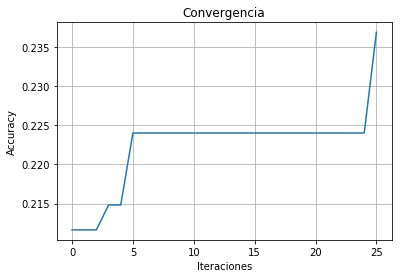

In [11]:
plt.plot(fxGBest)
plt.grid()
plt.title('Convergencia')
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
plt.show()